# Classifying numbers from zero to nine using Support Vector Machines
### We will build a classifier for recognizing handwritten digits.
### We will use data included in scikit-learn for educational purposes.

* Samples are stored in a table, with one row per sample and one column for each attribute (dimension)

* The core library for Machine Learning in Python is [scikit-learn](https://scikit-learn.org/).

In [1]:
from sklearn import datasets

digits = datasets.load_digits()

print(digits.data.shape)
digits.data 

(1797, 64)


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

* Another table gives us the solutions for each observation.

In [2]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

* Why do we have 64 features?

* In the raw data, each sample is an 8-row, 8-column array, which we can view via `digits.images[0]`.

In [3]:
print(digits.images.shape)
digits.images[0]

(1797, 8, 8)


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

* Thanks to matplotlib we can see what this table is.

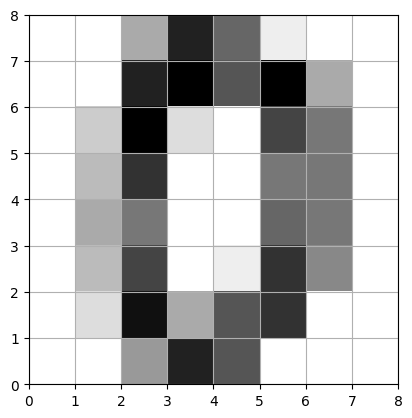

In [4]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.grid()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest', extent=(0, 8, 0, 8))

* But here we have 10 classes (one for each digit).

* How can we handle this?

* There are two strategies for multi-class classification:

 * One-versus-One (OvO)

 * One-versus-All (OvA or One-versus-Rest, OvR).

* In the One-to-One strategy, if we have $K$ classes we create $\binom{K}{2} = \frac{K(K-1)}{2}$ classifiers.

* Each of them classifies each sample between two classes.

* We count the classification results for each sample.

* Each sample will get the class of the majority of classifiers.

* Suppose we have five classes C1, C2, C3, C4, C5.

* We will build 10 classifiers.

* Here's what the results could look like for a sample, which we finally classify as C2:

| Classifier | Class |
|-------------|-------|
|   C1, C2    |  C2   |
|   C1, C3    |  C1   |
|   C1, C4    |  C1   |
|   C1, C5    |  C5   |
|   C2, C3    |  C2   |
|   C2, C4    |  C2   |
|   C2, C5    |  C2   |
|   C3, C4    |  C4   |
|   C3, C5    |  C5   |
|   C4, C5    |  C4   |

* In the One-to-All strategy, for $K$ classes we generate $K$ classifiers.

* Each of them classifies each sample between one class and all the rest.

* At the end, for each sample we choose the class in which the sample is classified best. In the case of Support Vector Machines the selection is made based on the distance from the hyperplane defined by each individual classifier.

* Suppose we have five classes C1, C2, C3, C4, C5.

* We build five classifiers.

* Each classifier gives a value corresponding to its belief about the respective class. If in the example the values ​​are as in the table below, the sample will be classified as C3:

| Ταξινομητής  | Τιμή       |
|--------------|------------|
|   C1, Rest   |   0,7      |
|   C2, Rest   |   0,6      |
|   C3, Rest   |   0,8      |
|   C4, Rest   |   0,5      |
|   C5, Rest   |   0,4      |

* We will use a Support Vector Machine for our classifier.

* The default kernel function uses the exponential function and accepts a hyperparameter $\gamma$ which multiplies the exponent.

* We will set $\gamma = 0{,}001$.

* We will also set $C = 100$. The `C' hyperparameter adjusts the stringency of the margin, the larger its value, the stricter the classifier.

In [5]:
from sklearn import svm

clf = svm.SVC(gamma=0.001, C=100.)

* After building our classifier, we need to train it.

* Training is done with the `fit()` method.

* Since this is supervised learning, in the `fit()` method we will give the examples and their solutions.

* As training data we will use all samples except the last one, which we will keep for testing.

In [6]:
clf.fit(digits.data[:-1], digits.target[:-1]) 

SVC(C=100.0, gamma=0.001)

* We can now predict the class for unseen digits.

* In our case, we ask the classifier to decide the class of the last image in our data, which was not used in the training phase.

In [7]:
clf.predict(digits.data[-1:])

array([8])

* To see what it was:

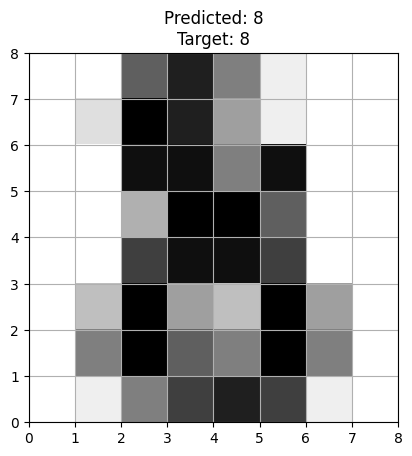

In [8]:
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, 
           interpolation='nearest', extent=(0, 8, 0, 8))
plt.grid()
_ = plt.title(f'Predicted: {clf.predict(digits.data[-1:])[0]}\nTarget: {digits.target[-1]}')

* The point is that for control we used one and only one digit.

* This is not enough to be able to judge the performance of our classifier.

* Before we move on, let's look at some more of the digits we have so we know what we're up against.

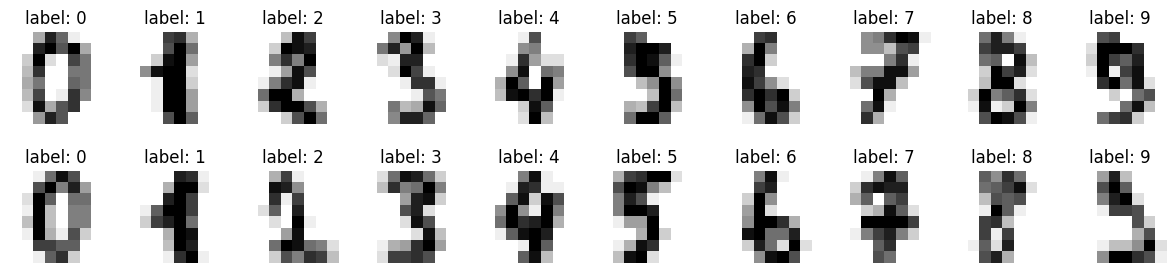

In [9]:
plt.figure(figsize=(10*1.5, 2*1.5))
images_and_labels = list(zip(digits.images, digits.target))
nrows, ncols = 2, 10
for index, (image, label) in enumerate(images_and_labels[:20]):
    plt.subplot(nrows, ncols, index+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'label: {label}')
plt.subplots_adjust(hspace=0.5)

* We will build a new classifier.

* This time we will leave the `C` parameter at the default value (`C=1.0`), which means our classifier will be more relaxed.

In [10]:
classifier = svm.SVC(gamma=0.001)

* We will use half the digits for training.

In [11]:
half_samples = len(digits.images) // 2

classifier.fit(digits.data[:half_samples], digits.target[:half_samples])

SVC(gamma=0.001)

* And the other half digits to learn.

In [12]:
expected = digits.target[half_samples:]
predicted = classifier.predict(digits.data[half_samples:])

* We can display some of the digits, predictions, and target each time to get an idea of ​​how the classifier did.

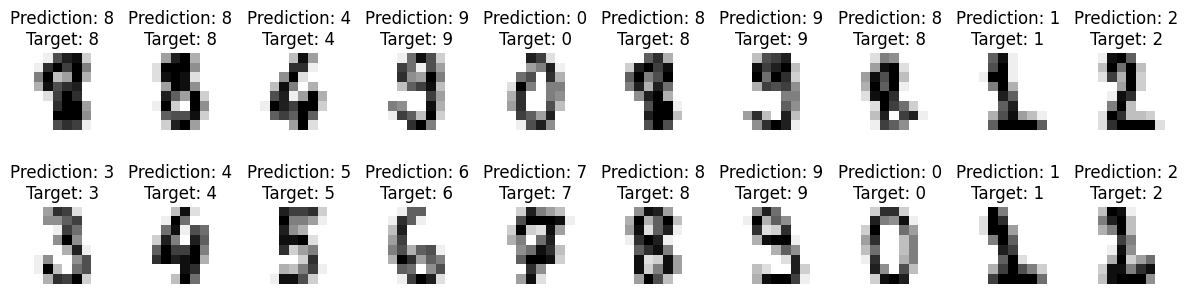

In [13]:
plt.figure(figsize=(10*1.5, 2*1.5))
images_predictions_targets = list(zip(digits.images[half_samples:], predicted, expected))
for index, (image, prediction, target) in enumerate(images_predictions_targets[:20]):
    plt.subplot(nrows, ncols, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Prediction: {prediction}\nTarget: {target}')
plt.subplots_adjust(hspace=1)

* Of course, we cannot in practice judge the effectiveness of a classifier like this by eye.

* For this purpose we use specific metrics.

* The most convenient way to see them is the *classification report* (classification report):

In [14]:
from sklearn import metrics

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




* Let's consider the table contents one by one.

* The *support* is the number of samples in each class.

* To understand the rest of the metrics, we will need the following sizes:

 * TP, True Positive
 * TN, True Negative
 * FP, False Positive
 * FN, False Negative
 * P, Positive, all positives in the population
 * N, Negative, all negatives in the population

* Accuracy gives us the percentage of correct predictions and is defined as:

$$ \frac{\textrm{TP} + \textrm{TN}}{\textrm{Sample Size}} $$

* We can get it with the `accuracy_score()` method.

In [15]:
metrics.accuracy_score(expected, predicted)

0.9688542825361512

* Accuracy is displayed at the bottom of the classification report.

In [16]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



* The *precision* gives us the percentage of correct positives for all that we predicted positively.

* Defined as:

$$\frac{\textrm{TP}}{\textrm{TP} + \textrm{FP}} = \frac{\textrm{TP}}{\textrm{All Positive Predictions}}$$

* We can get it with the `precision_score()` method.

* In the case that we have classification of several classes, to get the accuracy of each class we must give the parameter `average=None`.

In [17]:
metrics.precision_score(expected, predicted, average=None)

array([1.        , 0.98876404, 0.98837209, 0.97530864, 0.98876404,
       0.94623656, 0.98901099, 0.95652174, 0.93617021, 0.92783505])

* Alternatively, we can give the parameter `average=macro`, so we get the average of the accuracies for each class 

In [18]:
metrics.precision_score(expected, predicted, average='macro')

0.9696983376479764

* Alternatively, we can give the parameter `average=weighted`, so we get the average of the accuracies for each class adjusted for the support of each class, i.e. the weighted average.

* This may differ from the simple average in the case that our data is unbalanced and there is a difference in representation between classes.

In [19]:
metrics.precision_score(expected, predicted, average='weighted')

0.9696092010839529

* Precision, both averages, is the first column of the classification report.

In [20]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



* The *recall* gives us the percentage of correct positives in terms of all the positives we should predict.

* Defined as:

$$\frac{\textrm{TP}}{\textrm{TP} + \textrm{FN}} = \frac{\textrm{TP}}{\textrm{P}}$$

* We can get it with the `recall_score()` method, with corresponding parameters of `precision_score()`.

In [21]:
print(metrics.recall_score(expected, predicted, average=None))
print(metrics.recall_score(expected, predicted, average='macro'))
print(metrics.recall_score(expected, predicted, average='weighted'))


[0.98863636 0.96703297 0.98837209 0.86813187 0.95652174 0.96703297
 0.98901099 0.98876404 1.         0.97826087]
0.9691763901507882
0.9688542825361512


* The recall appears in the second column of the classification report.

In [22]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



* Precision and recall are particularly important in heterogeneous data.

* Suppose that our data belongs to two classes (positive and negative), and that 99.99% are negative and 0.01% are positive.

* Then a classifier that knows nothing but always says no will have 99.99% accuracy!

* But it will be completely useless.

* But such a classifier would have $\textrm{TP} = 0$, so it would have zero precision and recall.

* On the other hand, precision and recall measure different things.

* If we build a very strict classifier that detects only one true positive sample, the precision will be 100% because $\textrm{TP} = 1$ and $\textrm{FP} = 0$, but the recall will be abysmal.

* If we make a very lenient classifier that returns all positives, the recall will be 100% because $\textrm{FN} = 0$, but the precision will be abysmal.

* The $F_1$ metric combines precision and recall.

* Mathematically, it is the *harmonious mean* of precision and recall.

* The harmonic mean of $n$ numbers $x_1, x_2, \ldots, x_n$ is defined as:

$$H={\frac {n}{{\frac {1}{x_{1}}}+{\frac {1}{x_{2}}}+\cdots +{\frac {1}{x_{n}}}}}$$

* Thus, the $F_1$ metric is:

$$F_{1}=2\cdot \frac{1}{\tfrac{1}{\mathrm{precision}}+\tfrac{1}{\mathrm{recall}}} = 2\cdot {\frac{ \mathrm{precision} \cdot \mathrm{recall}}{\mathrm{precision} +\mathrm{recall}}}$$

* We use the $F_1$ metric instead of the simple mean because it penalizes outliers.

* If either recall or precision is zero, the $F_1$ metric will be zero.

* Another way to evaluate the results is through the *confusion matrix*:

In [23]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


* The confusion matrix can be visualized via `ConfusionMatrixDisplay.from_estimator()` or `ConfusionMatrixDisplay.from_predictions()`.

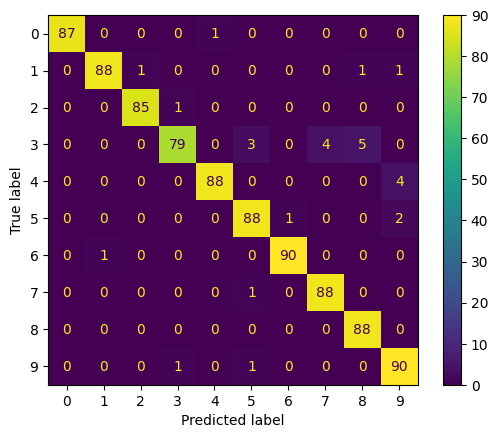

In [24]:
_ = metrics.ConfusionMatrixDisplay.from_estimator(classifier, 
                                                  digits.data[half_samples:], 
                                                  digits.target[half_samples:])

* Notice something: in statistics too we can (as we have seen) predict values ​​based on our data.

### In statistics, however, our purpose is different: to *explain* our data, building a model.

* We evaluate the model using statistical tests.

### In Machine Learning, our purpose is not to explain our data. It is to use them to make predictions.

* Here are the metrics we use to evaluate our results.